<a href="https://colab.research.google.com/github/rizkaaa19/MachineLearning/blob/main/UAS/Reproduce%20Code/Reproduce_Codes_01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UAS Machine Learning**
Nama : Rizka Rahmadina

NIM : 1103204115

Reproduce Codes "01_pytorch_workflow"

In [2]:
import datetime
import torch
import matplotlib.pyplot as plt
from torch import nn

In [3]:
# Display the last modification date for documentation purposes
last_updated = datetime.datetime.now()
print(f"Document last modified: {last_updated}")

Document last modified: 2024-01-02 16:55:12.332981


In [30]:
# Configure code to be device-agnostic
import torch

# Check if CUDA is available, otherwise use CPU
preferred_device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Selected device: {preferred_device}")


Selected device: cpu


# **1. Create a straight line dataset using the linear regression formula `(weight * X + bias)`.**

In [6]:
# Define custom data parameters
custom_weight = 0.5
custom_bias = 1.2

# Generate X and y using different linear regression features
custom_X = torch.arange(0, 1, 0.02).unsqueeze(dim=0).t()
custom_y = custom_weight * custom_X + custom_bias

# Display information about the custom dataset
print(f"Number of X samples: {len(custom_X)}")
print(f"Number of y samples: {len(custom_y)}")
print("First 10 X & y samples:")
print(f"X: {custom_X[:10]}\ny: {custom_y[:10]}")


Number of X samples: 50
Number of y samples: 50
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y: tensor([[1.2000],
        [1.2100],
        [1.2200],
        [1.2300],
        [1.2400],
        [1.2500],
        [1.2600],
        [1.2700],
        [1.2800],
        [1.2900]])


In [8]:
# Customized splitting of the custom data into training and testing
custom_train_split = int(len(custom_X) * 0.7)
custom_X_train = custom_X[:custom_train_split]
custom_y_train = custom_y[:custom_train_split]
custom_X_test = custom_X[custom_train_split:]
custom_y_test = custom_y[custom_train_split:]
print(f"Number of X_train samples: {len(custom_X_train)}")
print(f"Number of y_train samples: {len(custom_y_train)}")
print(f"Number of X_test samples: {len(custom_X_test)}")
print(f"Number of y_test samples: {len(custom_y_test)}")


Number of X_train samples: 35
Number of y_train samples: 35
Number of X_test samples: 15
Number of y_test samples: 15


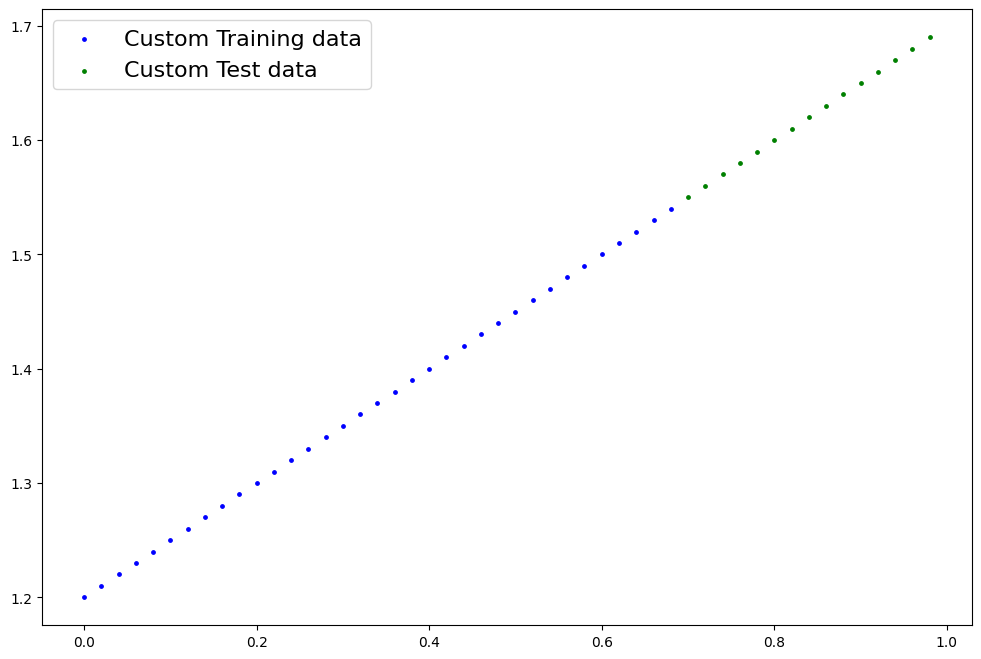

In [9]:
# Customized plot function with different parameters
def custom_plot_predictions(train_data=custom_X_train,
                            train_labels=custom_y_train,
                            test_data=custom_X_test,
                            test_labels=custom_y_test,
                            custom_predictions=None):
    plt.figure(figsize=(12, 8))  # Different figsize
    plt.scatter(train_data, train_labels, c='blue', s=6, label="Custom Training data")  # Different s (size)
    plt.scatter(test_data, test_labels, c='green', s=6, label="Custom Test data")  # Different s (size)

    if custom_predictions is not None:
        plt.scatter(test_data, custom_predictions, c='red', s=6, label="Custom Predictions")  # Different s (size)
    plt.legend(prop={"size": 16})  # Different prop size

# Call the custom plot function
custom_plot_predictions()


# **2. Build a PyTorch model by subclassing `nn.Module.`**


*   Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
*   Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
*   Once you've constructed the model, make an instance of it and check its state_dict().
*   Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.


In [24]:
# Custom PyTorch linear regression model by subclassing nn.Module
class CustomLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.custom_weight = nn.Parameter(data=torch.randn(1, requires_grad=True, dtype=torch.float))
        self.custom_bias = nn.Parameter(data=torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        return self.custom_weight * x + self.custom_bias

# Instantiate the custom model
torch.manual_seed(24)
custom_model = CustomLinearRegressionModel()
custom_model, custom_model.state_dict()


(CustomLinearRegressionModel(),
 OrderedDict([('custom_weight', tensor([1.0139])),
              ('custom_bias', tensor([0.8988]))]))

In [25]:
# Check the device of the first parameter in the custom model
next(custom_model.parameters()).device


device(type='cpu')

In [31]:
# Instantiate the custom model and move it to the preferred device
custom_model.to(preferred_device)
list(custom_model.parameters())


[Parameter containing:
 tensor([1.0139], requires_grad=True),
 Parameter containing:
 tensor([0.8988], requires_grad=True)]

# **3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD**(params, lr)` respectively.

* Set the learning rate of the optimizer to be 0.01 and the parameters to
optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [32]:
# Define the loss function and optimizer for the custom model
custom_loss_fn = nn.L1Loss()
custom_optimizer = torch.optim.SGD(params=custom_model.parameters(), lr=0.005)


In [34]:
# Custom training loop for the custom model for 300 epochs
torch.manual_seed(24)  # Different seed for variety

custom_epochs = 300

# Send data to the target device
custom_X_train = custom_X_train.to(preferred_device)
custom_X_test = custom_X_test.to(preferred_device)
custom_y_train = custom_y_train.to(preferred_device)
custom_y_test = custom_y_test.to(preferred_device)

for custom_epoch in range(custom_epochs):
    ### Training

    # Put the custom model in train mode
    custom_model.train()

    # 1. Forward pass
    custom_y_pred = custom_model(custom_X_train)

    # 2. Calculate loss
    custom_loss = custom_loss_fn(custom_y_pred, custom_y_train)

    # 3. Zero gradients
    custom_optimizer.zero_grad()

    # 4. Backpropagation
    custom_loss.backward()

    # 5. Step the optimizer
    custom_optimizer.step()

    ### Perform testing every 20 epochs
    if custom_epoch % 15 == 0:
        # Put the custom model in evaluation mode and setup inference context
        custom_model.eval()
        with torch.no_grad():
            # 1. Forward pass
            custom_y_preds = custom_model(custom_X_test)
            # 2. Calculate test loss
            custom_test_loss = custom_loss_fn(custom_y_preds, custom_y_test)
            # Print out what's happening
            print(f"Epoch: {custom_epoch} | Train loss: {custom_loss:.2f} | Test loss: {custom_test_loss:.2f}")


Epoch: 0 | Train loss: 0.03 | Test loss: 0.08
Epoch: 15 | Train loss: 0.03 | Test loss: 0.07
Epoch: 30 | Train loss: 0.03 | Test loss: 0.07
Epoch: 45 | Train loss: 0.02 | Test loss: 0.06
Epoch: 60 | Train loss: 0.02 | Test loss: 0.06
Epoch: 75 | Train loss: 0.02 | Test loss: 0.05
Epoch: 90 | Train loss: 0.02 | Test loss: 0.05
Epoch: 105 | Train loss: 0.02 | Test loss: 0.04
Epoch: 120 | Train loss: 0.01 | Test loss: 0.04
Epoch: 135 | Train loss: 0.01 | Test loss: 0.03
Epoch: 150 | Train loss: 0.01 | Test loss: 0.02
Epoch: 165 | Train loss: 0.01 | Test loss: 0.02
Epoch: 180 | Train loss: 0.00 | Test loss: 0.01
Epoch: 195 | Train loss: 0.00 | Test loss: 0.01
Epoch: 210 | Train loss: 0.00 | Test loss: 0.00
Epoch: 225 | Train loss: 0.00 | Test loss: 0.01
Epoch: 240 | Train loss: 0.00 | Test loss: 0.00
Epoch: 255 | Train loss: 0.00 | Test loss: 0.01
Epoch: 270 | Train loss: 0.00 | Test loss: 0.00
Epoch: 285 | Train loss: 0.00 | Test loss: 0.01


# **4. Make predictions with the trained model on the test data.**

* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [35]:
# Make predictions with the custom model
custom_model.eval()

with torch.no_grad():
    custom_y_preds = custom_model(custom_X_test)
custom_y_preds


tensor([[1.5555],
        [1.5656],
        [1.5757],
        [1.5858],
        [1.5959],
        [1.6060],
        [1.6161],
        [1.6262],
        [1.6363],
        [1.6464],
        [1.6565],
        [1.6666],
        [1.6767],
        [1.6868],
        [1.6969]])

In [36]:
# Move predictions to CPU for compatibility with non-CUDA-enabled libraries
custom_y_preds_cpu = custom_y_preds.cpu()


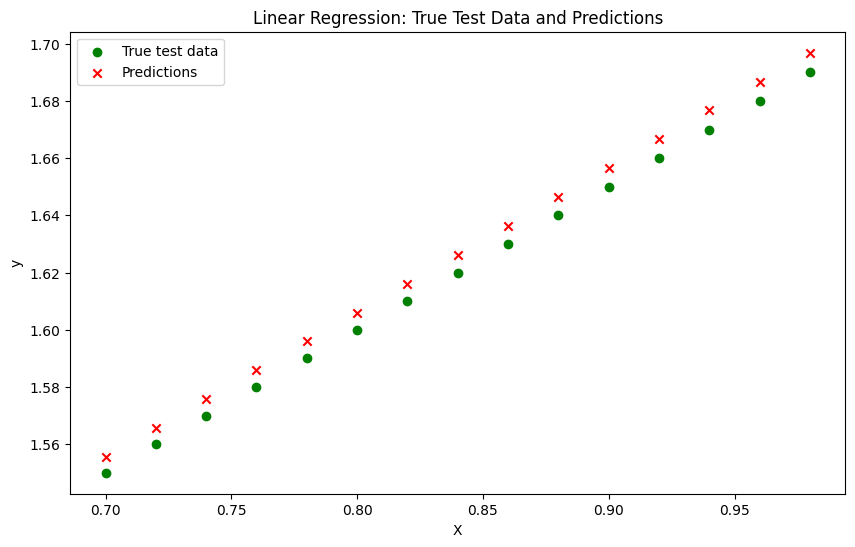

In [38]:
import matplotlib.pyplot as plt

# Define the plot_predictions function
def plot_predictions(test_data, test_labels, predictions):
    plt.figure(figsize=(10, 6))
    plt.scatter(test_data, test_labels, label='True test data', color='green')
    plt.scatter(test_data, predictions, label='Predictions', color='red', marker='x')
    plt.title('Linear Regression: True Test Data and Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Plot the predictions for the custom model (ensure predictions are on CPU)
plot_predictions(test_data=custom_X_test.cpu(),
                 test_labels=custom_y_test.cpu(),
                 predictions=custom_y_preds_cpu)


# **5. Save your trained model's `state_dict()` to file.**

* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [39]:
from pathlib import Path

# 1. Create a directory for models
CUSTOM_MODEL_PATH = Path("custom_models")
CUSTOM_MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a path for saving the custom model
CUSTOM_MODEL_NAME = "custom_linear_regression_model"
CUSTOM_MODEL_SAVE_PATH = CUSTOM_MODEL_PATH / CUSTOM_MODEL_NAME

# 3. Save the custom model state_dict()
print(f"Saving custom model to {CUSTOM_MODEL_SAVE_PATH}")
torch.save(obj=custom_model.state_dict(), f=CUSTOM_MODEL_SAVE_PATH)


Saving custom model to custom_models/custom_linear_regression_model


In [40]:
# Create a new instance of the custom model and load the saved state_dict() (put it on the target device)
loaded_custom_model = CustomLinearRegressionModel()
loaded_custom_model.load_state_dict(torch.load(f=CUSTOM_MODEL_SAVE_PATH))
loaded_custom_model.to(preferred_device)


CustomLinearRegressionModel()

In [51]:
# Make predictions with the loaded custom model and compare them to the previous predictions
custom_y_preds_new = loaded_custom_model(custom_X_test)
result_comparison = torch.equal(custom_y_preds, custom_y_preds_new)
print(result_comparison)


True


In [55]:
# Get the state_dict() of the loaded custom model
state_dict_loaded_model = loaded_custom_model.state_dict()
print(state_dict_loaded_model)


OrderedDict([('custom_weight', tensor([0.5049])), ('custom_bias', tensor([1.2021]))])
